In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("SpeedDating.csv")
variables = data.drop([data.columns[0], 'TARGET'], axis=1)
target = data['TARGET']

variables

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,0.14,7.0
1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,10.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,0.54,7.0
2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,9.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,0.61,7.0
3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,9.0,6.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.21,6.0
4,50.0,0.0,30.0,10.0,0.0,10.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,15.0,15.0,20.0,25.0,10.0,15.0,2.0,6.0,2.0,1.0,25.0,10.0,20.0,20.0,10.0,15.0,0.35,5.0
1044,15.0,15.0,25.0,25.0,15.0,5.0,4.0,8.0,3.0,2.0,25.0,10.0,20.0,20.0,10.0,15.0,0.45,5.0
1045,20.0,20.0,20.0,20.0,10.0,10.0,5.0,4.0,5.0,3.0,25.0,10.0,20.0,20.0,10.0,15.0,0.13,5.0
1046,15.0,15.0,25.0,25.0,20.0,0.0,4.0,7.0,3.0,0.0,25.0,10.0,20.0,20.0,10.0,15.0,0.54,5.0


In [25]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import dalex as dx
import shap

import warnings
warnings.filterwarnings("ignore")

v_train, v_test, t_train, t_test = train_test_split(variables, target, random_state=69, test_size=0.2)

def use_model(model):
    name = type(model).__name__
    print(f"Model: {name}")
    model.fit(v_train, t_train)
    
    explainer = dx.Explainer(model, v_test, t_test)
    explainer.model_performance()

    pvi = explainer.model_parts(random_state=0)
    plt = pvi.plot()
    if plt != None:
        plot.update_layout(autosize=False, width=600, height=450)

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost

randomForestModel = RandomForestClassifier()

models = [randomForestModel, GradientBoostingClassifier(), xgboost.XGBClassifier(
    n_estimators=50, 
    max_depth=2, 
    use_label_encoder=False, 
    eval_metric="logloss",
    
    enable_categorical=True,
    tree_method="hist"
), LogisticRegression(max_iter=1000)]

Model: RandomForestClassifier
Preparation of a new explainer is initiated

  -> data              : 210 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 210 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002ABA127F560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.194, max = 0.85
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.78, mean = -0.0223, max = 0.97
  -> model_info        : package sklearn

A new explainer has been created!


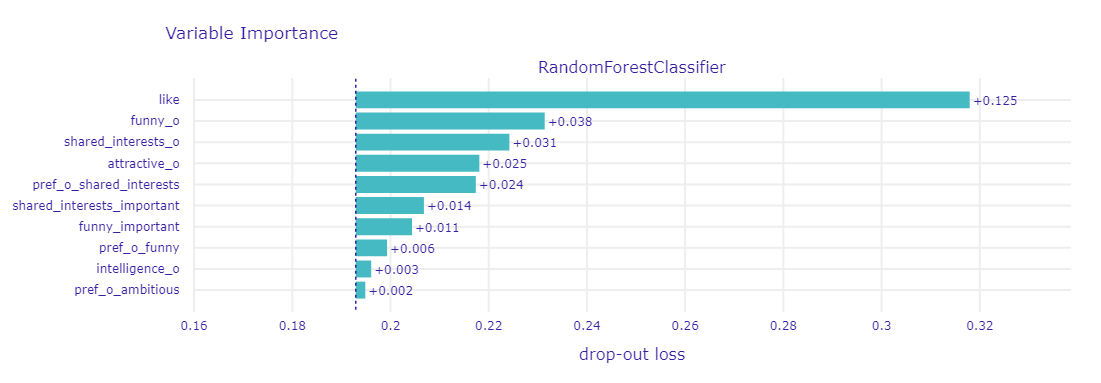

Model: GradientBoostingClassifier
Preparation of a new explainer is initiated

  -> data              : 210 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 210 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002ABA127F560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00594, mean = 0.181, max = 0.981
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.857, mean = -0.00929, max = 0.971
  -> model_info        : package sklearn

A new explainer has been created!


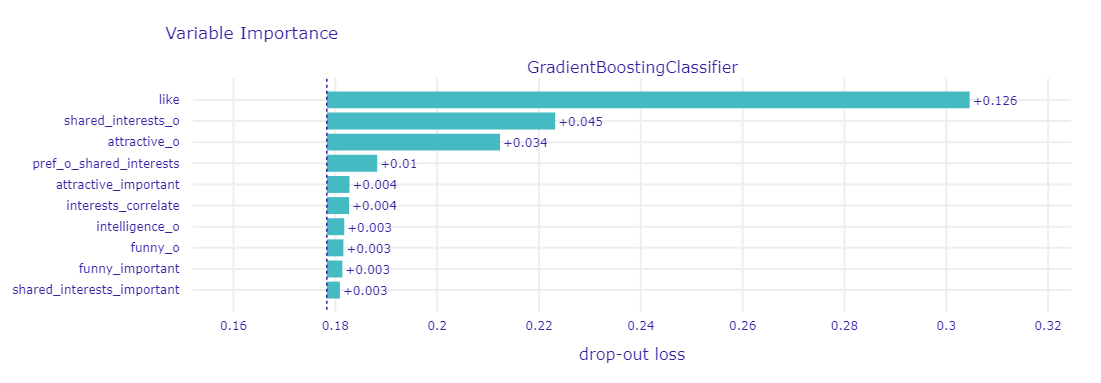

Model: XGBClassifier
Preparation of a new explainer is initiated

  -> data              : 210 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 210 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002ABA127F560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0033, mean = 0.181, max = 0.968
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.858, mean = -0.00947, max = 0.956
  -> model_info        : package xgboost

A new explainer has been created!


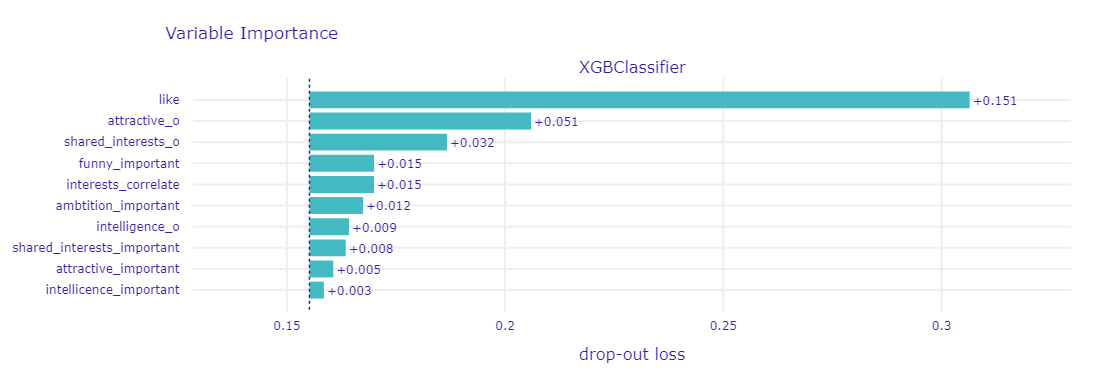

Model: LogisticRegression
Preparation of a new explainer is initiated

  -> data              : 210 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 210 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002ABA127F560> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00205, mean = 0.179, max = 0.922
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.82, mean = -0.00762, max = 0.949
  -> model_info        : package sklearn

A new explainer has been created!


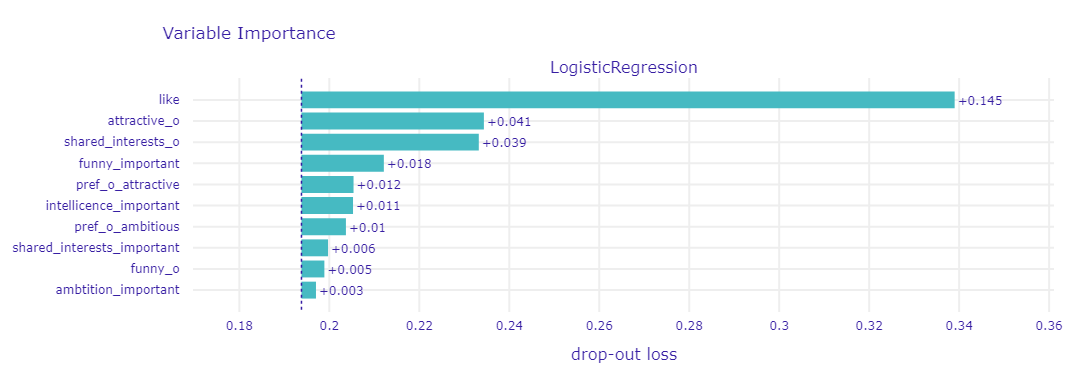

In [27]:
for model in models:
    use_model(model)

In [74]:
from tabulate import tabulate
ord = randomForestModel.feature_importances_.argsort()[::-1][0:10]
importance = randomForestModel.feature_importances_[ord]
features = v_test.columns[ord]
pd.DataFrame({'variable': features, 'importance': importance})

,variable,importance
0,like,0.130377
1,attractive_o,0.088757
2,interests_correlate,0.086241
3,shared_interests_o,0.081066
4,funny_o,0.057416
5,pref_o_funny,0.055907
6,pref_o_shared_interests,0.050350
7,pref_o_attractive,0.047504
8,pref_o_sincere,0.045699
9,shared_interests_important,0.042470


In [75]:
from tabulate import tabulate
print(tabulate(zip(features, importance), ["Feature", "Importance"], tablefmt="github"))

| Feature                    |   Importance |
|----------------------------|--------------|
| like                       |    0.130377  |
| attractive_o               |    0.0887565 |
| interests_correlate        |    0.086241  |
| shared_interests_o         |    0.0810659 |
| funny_o                    |    0.0574163 |
| pref_o_funny               |    0.0559072 |
| pref_o_shared_interests    |    0.0503503 |
| pref_o_attractive          |    0.047504  |
| pref_o_sincere             |    0.045699  |
| shared_interests_important |    0.0424705 |


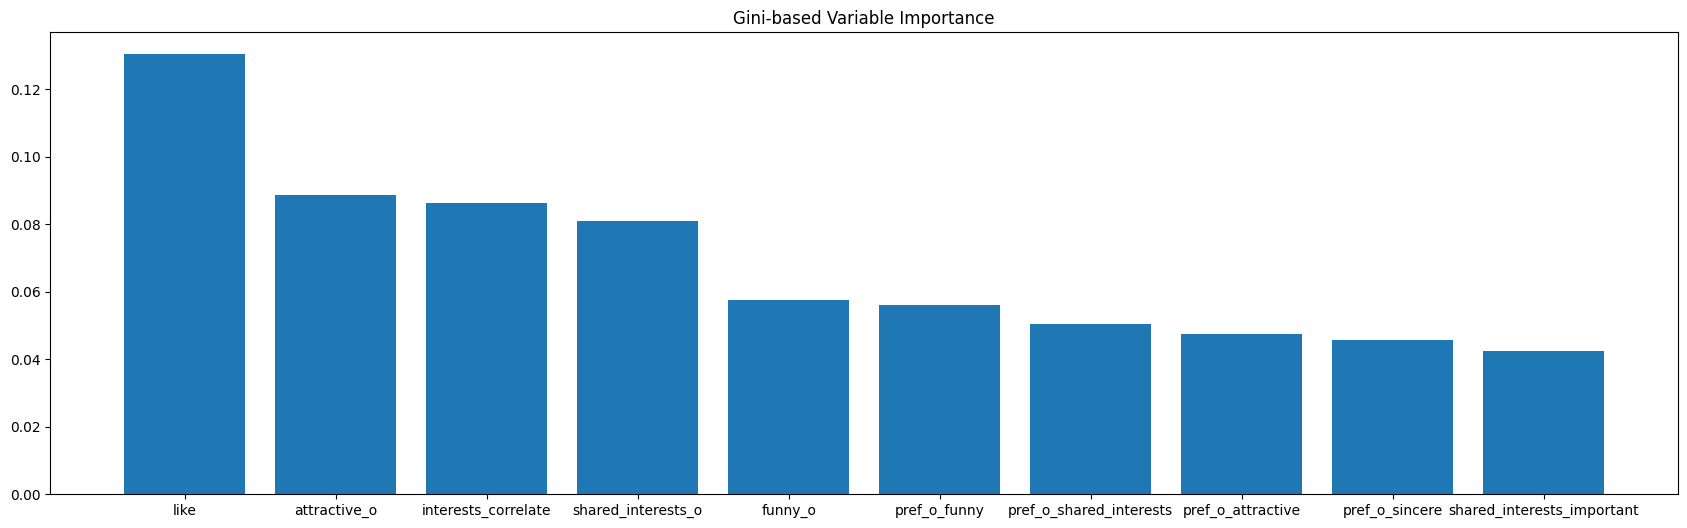

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,6))
plt.bar(features, importance)
plt.title("Gini-based Variable Importance")
plt.show()


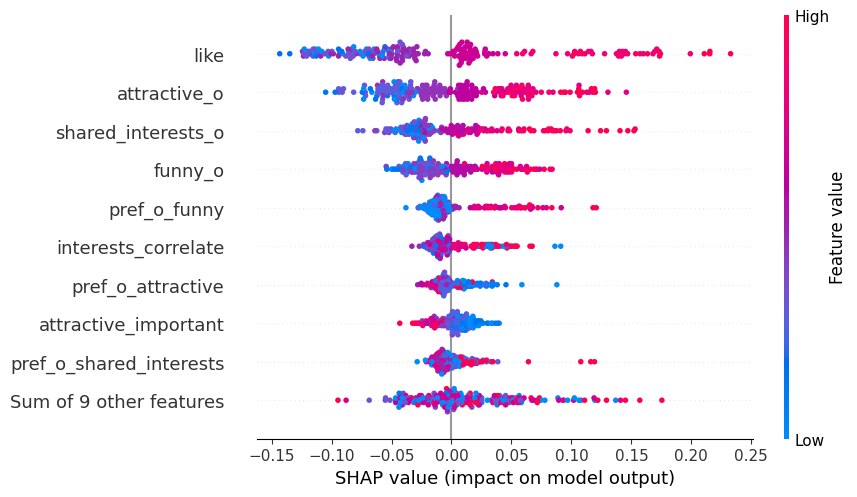

In [54]:
import shap

shapsplainer = shap.Explainer(randomForestModel)
shap_values = shapsplainer(v_test)
shap.plots.beeswarm(shap_values[:, :, 1])